In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")  
df.head()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1.0,3.0,3.0,1967.0,1.0,1.0,48.0,8.297631,5.935734,6021
1,2,287.678577,1.0,2.0,1.0,1949.0,0.0,1.0,37.0,6.061466,10.827392,5914
2,3,232.998485,1.0,3.0,2.0,1923.0,1.0,0.0,14.0,2.911442,6.904599,4645
3,4,199.664621,5.0,2.0,2.0,1918.0,0.0,0.0,17.0,2.070949,8.284019,5831
4,5,89.004660,4.0,3.0,3.0,1999.0,1.0,0.0,34.0,1.523278,14.648277,6199


In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Square_Feet         495 non-null    float64
 2   Num_Bedrooms        494 non-null    float64
 3   Num_Bathrooms       499 non-null    float64
 4   Num_Floors          497 non-null    float64
 5   Year_Built          498 non-null    float64
 6   Has_Garden          494 non-null    float64
 7   Has_Pool            499 non-null    float64
 8   Garage_Size         496 non-null    float64
 9   Location_Score      499 non-null    float64
 10  Distance_to_Center  499 non-null    float64
 11  Price               500 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 47.0 KB
None
               ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  \
count  500.000000   495.000000    494.000000     499.000000  497.000000   
me

In [4]:
print(df.isnull().sum())

ID                    0
Square_Feet           5
Num_Bedrooms          6
Num_Bathrooms         1
Num_Floors            3
Year_Built            2
Has_Garden            6
Has_Pool              1
Garage_Size           4
Location_Score        1
Distance_to_Center    1
Price                 0
dtype: int64


In [16]:
df.dropna(inplace=True) 

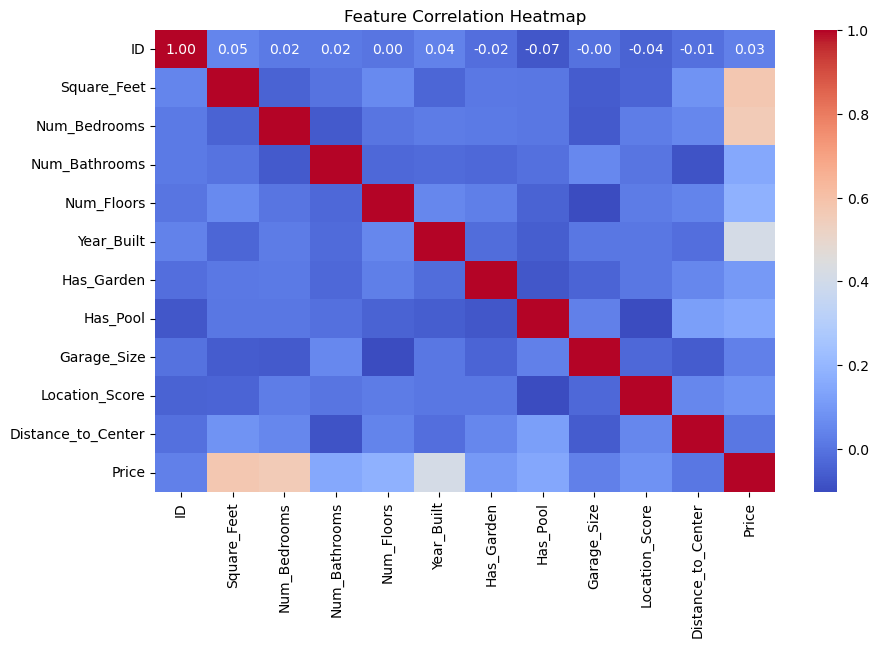

/home/ashwin-kumar-singh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ashwin-kumar-singh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ashwin-kumar-singh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ashwin-kumar-singh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

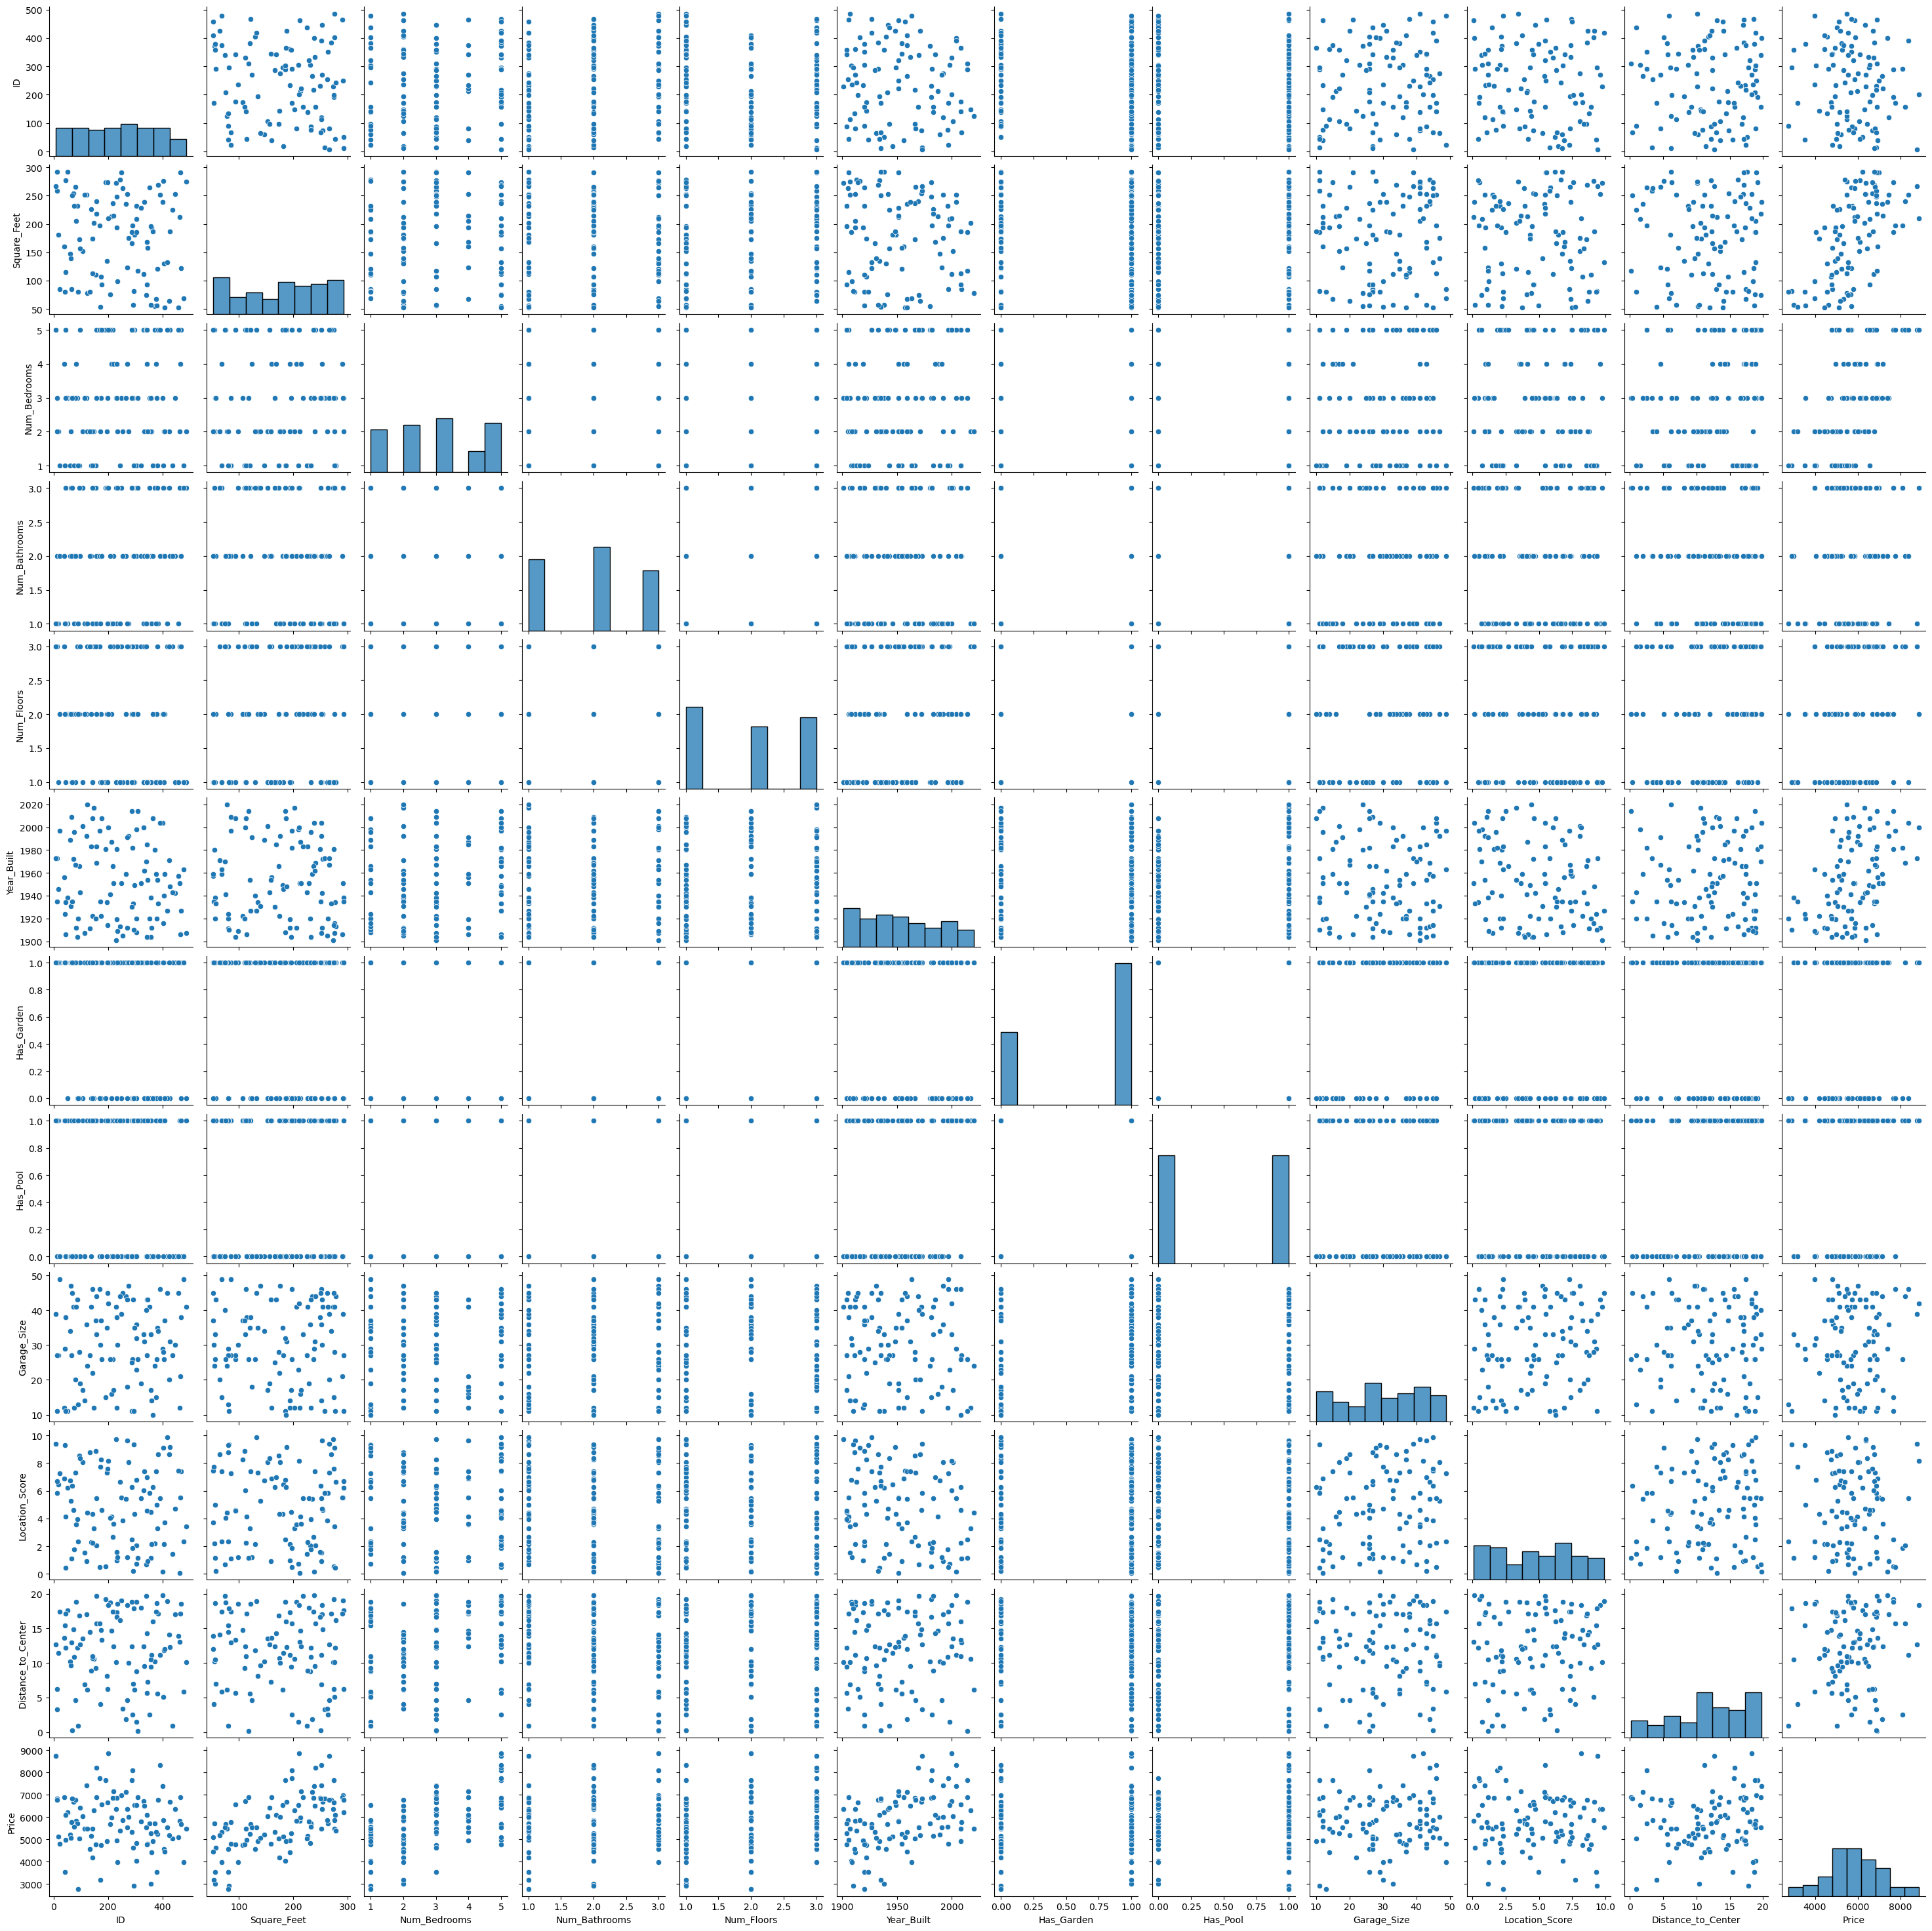

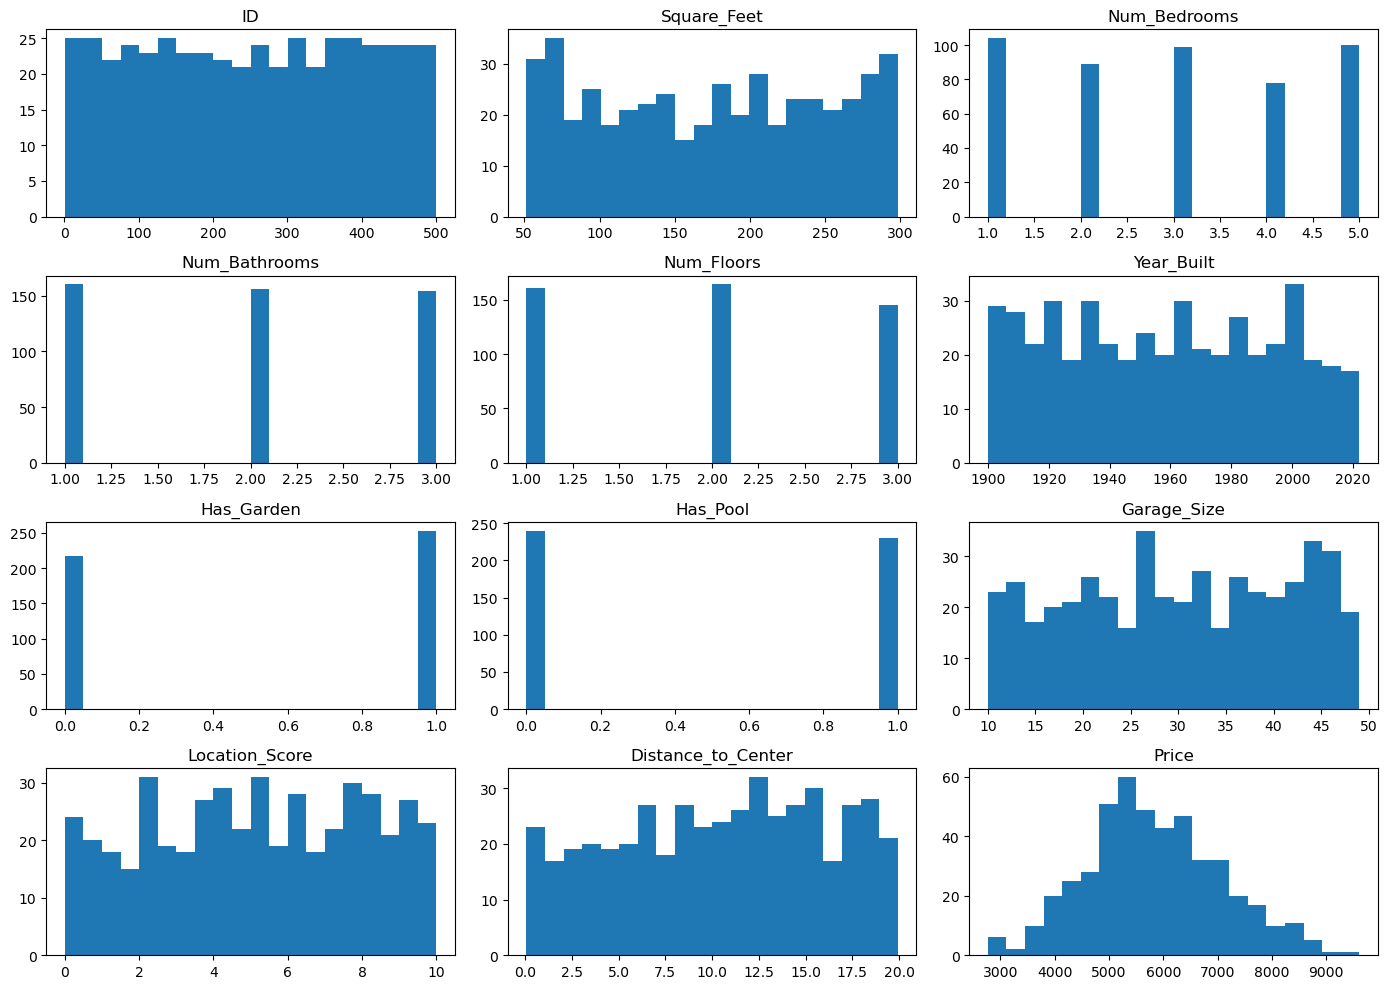

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(df.sample(100), diag_kind='hist')  
plt.show()
# Histograms
df.hist(bins=20, figsize=(14, 10), grid=False)
plt.tight_layout()
plt.show()


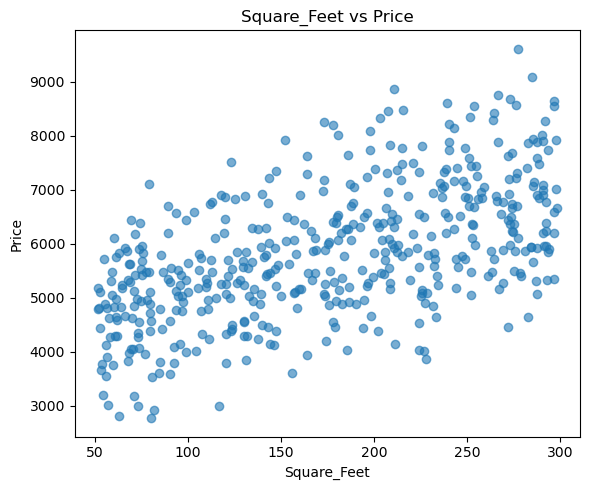

In [30]:
fig, axs = plt.subplots(1, 1, figsize=(6, 5)) 
axs.scatter(df['Square_Feet'], y, alpha=0.6)
axs.set_xlabel("Square_Feet")
axs.set_ylabel("Price")
axs.set_title("Square_Feet vs Price")
plt.tight_layout()
plt.show()


In [32]:
X = df.drop(columns=["Price"])

In [33]:
X_filled = X.fillna(X.mean())

In [34]:
X_np = X_filled.values


In [35]:
y_np = y.values.reshape(-1, 1) 


In [36]:
# Add intercept term (bias)
X_with_bias = np.c_[np.ones(X_np.shape[0]), X_np]

# Normal Equation: θ = (XᵀX)^(-1)Xᵀy
theta = np.linalg.inv(X_with_bias.T @ X_with_bias) @ (X_with_bias.T @ y_np)

# Predictions
y_pred = X_with_bias @ theta

In [37]:
# Mean Squared Error (MSE)
mse = np.mean((y_pred - y_np) ** 2)

# Residual Sum of Squares (RSS)
rss = np.sum((y_pred - y_np) ** 2)

print("Model Coefficients (theta):\n", theta.flatten())
print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"Residual Sum of Squares (RSS): {rss:.2f}")


Model Coefficients (theta):
 [-2.87355548e+04 -4.46029059e-02  1.01781379e+01  5.05539147e+02
  2.96029841e+02  2.15214928e+02  1.50757016e+01  2.98539345e+02
  4.78541124e+02  1.13505691e+01  4.80223385e+01 -2.01051792e+01]

Mean Squared Error (MSE): 35864.95
Residual Sum of Squares (RSS): 16856524.71


In [46]:
import numpy as np
from sklearn.metrics import mean_squared_error


variance_y = np.var(y_np)
print(variance_y)
print(f"Variance of target variable: {variance_y}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_np, y_pred)}")

if mean_squared_error(y_np, y_pred) < variance_y:
    print("Model performs better than just predicting the mean!")
else:
    print("Model may not be better than just predicting the mean.")


1510557.0526029882
Variance of target variable: 1510557.0526029882
Mean Squared Error (MSE): 35864.94618144178
Model performs better than just predicting the mean!


In [47]:
from sklearn.metrics import r2_score

r2 = r2_score(y_np, y_pred)
print(f"R-squared (R²): {r2}")


R-squared (R²): 0.976257138967615


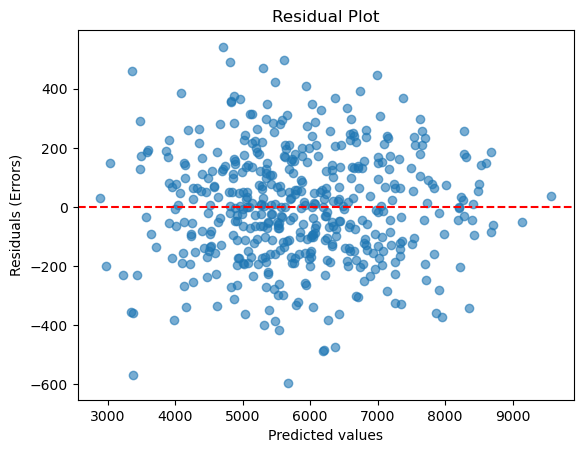

In [48]:
import matplotlib.pyplot as plt

residuals = y_np - y_pred

plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot")
plt.show()
